### Neural Network Model with a Single Perceptron and One Input Node

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_regression

In [21]:
X, y = make_regression(n_samples=30, n_features=1, random_state=1, noise=20)
y = np.reshape(y, (-1, 1))

In [22]:
X = pd.DataFrame(X)

In [23]:
def compute_cost(X, y, W, b):
    m = X.shape[0]
    y_hat = X.to_numpy() @ W + b
    cost = tf.reduce_sum((y - y_hat) ** 2) / (2 * m)
    return cost

In [24]:
def gradiant_descent(W, b, dj_dw, dj_db, learning_rate):
    W.assign_sub(learning_rate * dj_dw)
    b.assign_sub(learning_rate * dj_db)
    return W, b

In [25]:
def nn_model(X, y, W, b, epochs, learning_rate):
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            cost = compute_cost(X, y, W, b)
            
            if epoch % 10 == 0:
                print(f'Epoch:{epoch}, Cost: {cost}')

        dj_dw, dj_db = tape.gradient(cost, [W, b])
        
        W, b = gradiant_descent(W, b, dj_dw, dj_db, learning_rate)

    W = W.numpy()
    b = b.numpy()
    return W, b

In [26]:
W = tf.Variable(tf.random.normal((1, 1)), name='W')
b = tf.Variable(tf.random.normal((1, 1)), name='b')

LEARNING_RATE = 0.05
EPOCHS = 200
W, b = nn_model(X, y, W, b, EPOCHS, LEARNING_RATE)

Epoch:0, Cost: 759.4603271484375
Epoch:10, Cost: 358.7154846191406
Epoch:20, Cost: 218.05307006835938
Epoch:30, Cost: 168.4793243408203


Epoch:40, Cost: 150.93614196777344
Epoch:50, Cost: 144.70237731933594
Epoch:60, Cost: 142.4781951904297
Epoch:70, Cost: 141.681396484375
Epoch:80, Cost: 141.39483642578125
Epoch:90, Cost: 141.29136657714844
Epoch:100, Cost: 141.25387573242188
Epoch:110, Cost: 141.24026489257812
Epoch:120, Cost: 141.2352752685547
Epoch:130, Cost: 141.23345947265625
Epoch:140, Cost: 141.23280334472656
Epoch:150, Cost: 141.23252868652344
Epoch:160, Cost: 141.23245239257812
Epoch:170, Cost: 141.23240661621094
Epoch:180, Cost: 141.23240661621094
Epoch:190, Cost: 141.23240661621094


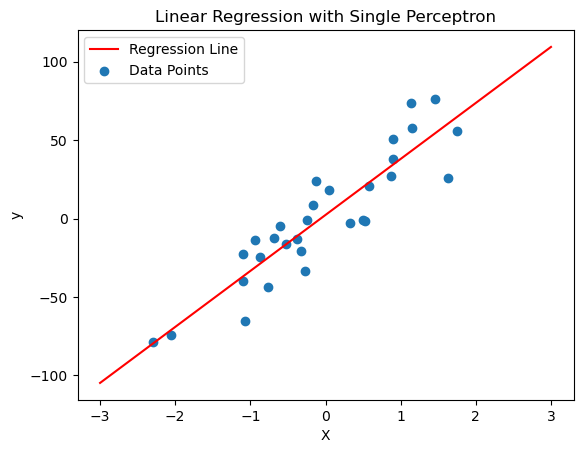

In [27]:
x = np.linspace(-3, 3, 50)
y_pred = x.reshape(-1, 1) @ W + b

plt.plot(x, y_pred, c='r', label='Regression Line')
plt.scatter(X, y, label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Single Perceptron')
plt.legend()
plt.show()

### Neural Network Model with a Single Perceptron and Two Input Nodes

In [28]:
import seaborn as sns

from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv('house_prices_train.csv', index_col='Id', na_filter=True)

In [30]:
df = pd.get_dummies(df, drop_first=True)
df.corrwith(df['SalePrice']).sort_values()

ExterQual_TA        -0.589044
KitchenQual_TA      -0.519298
BsmtQual_TA         -0.452394
GarageFinish_Unf    -0.410608
GarageType_Detchd   -0.354141
                       ...   
GarageArea           0.623431
GarageCars           0.640409
GrLivArea            0.708624
OverallQual          0.790982
SalePrice            1.000000
Length: 245, dtype: float64

In [31]:
df[['OverallQual', 'GrLivArea']] # these two columns has highest correlation with SalePrice

,OverallQual,GrLivArea
Id,,
1,7,1710
2,6,1262
3,7,1786
4,7,1717
5,8,2198
...,...,...
1456,6,1647
1457,6,2073
1458,7,2340


In [32]:
X = df[['OverallQual', 'GrLivArea']]
y = df['SalePrice']

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

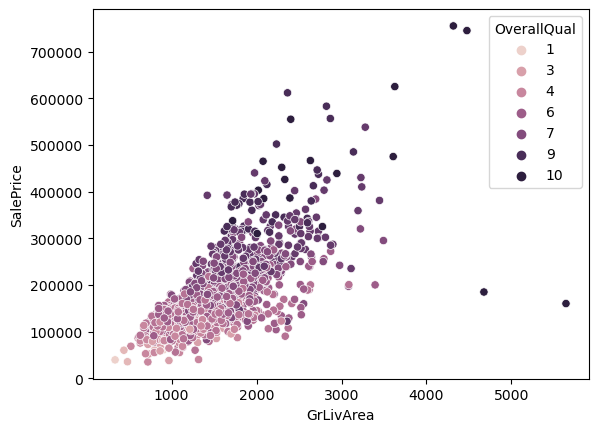

In [33]:
sns.scatterplot(data=X, x='GrLivArea', y=y, hue='OverallQual')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
X_train_norm = (X_train - X.mean()) / X.std()
X_test_norm = (X_test - X.mean()) / X.std()
y_train_norm = (y_train - y.mean()) / y.std()

y_train_norm = np.reshape(y_train_norm, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

In [36]:
W = tf.Variable(tf.random.normal((2, 1)), name='W')
b = tf.Variable(tf.random.normal((1, 1)), name='b')

LEARNING_RATE = 0.05
EPOCHS = 200

W, b = nn_model(X_train_norm, y_train_norm, W, b, EPOCHS, LEARNING_RATE)

Epoch:0, Cost: 4.452807426452637
Epoch:10, Cost: 1.8716645240783691
Epoch:20, Cost: 0.9155153632164001


Epoch:30, Cost: 0.5262658596038818
Epoch:40, Cost: 0.35105884075164795
Epoch:50, Cost: 0.2638291120529175
Epoch:60, Cost: 0.21633224189281464
Epoch:70, Cost: 0.18861596286296844
Epoch:80, Cost: 0.1716558337211609
Epoch:90, Cost: 0.1609632968902588
Epoch:100, Cost: 0.1541018933057785
Epoch:110, Cost: 0.1496541053056717
Epoch:120, Cost: 0.1467544287443161
Epoch:130, Cost: 0.14485810697078705
Epoch:140, Cost: 0.14361578226089478
Epoch:150, Cost: 0.14280112087726593
Epoch:160, Cost: 0.142266646027565
Epoch:170, Cost: 0.14191588759422302
Epoch:180, Cost: 0.1416856050491333
Epoch:190, Cost: 0.1415344923734665


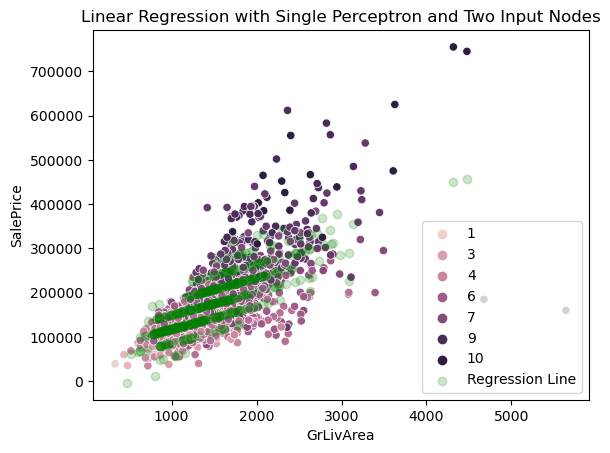

In [37]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue='OverallQual')

y_values_norm = X_test_norm @ W + b 
y_values = y_values_norm * y.std() + y.mean()
plt.scatter(X_test['GrLivArea'], y_values, color='green', label='Regression Line', alpha=0.2)

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression with Single Perceptron and Two Input Nodes')
plt.legend()
plt.show()


In [38]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_values))
print(f'rmse : {rmse}')
print(f'r2 score: {r2_score(y_test, y_values)}')

rmse : 43285.4235413695
r2 score: 0.744785722606611
